In [32]:
from numpy import linspace
from math import factorial
import pandas as pd
import numpy as np

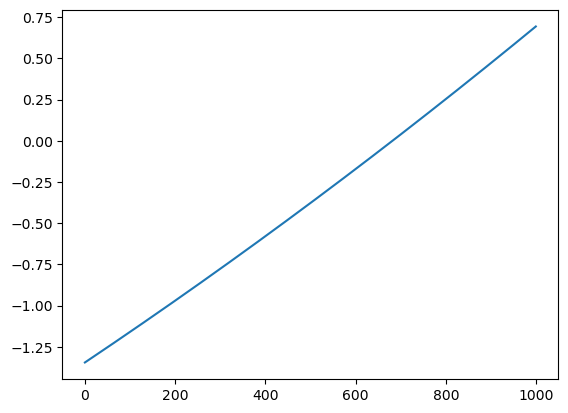

In [33]:


def function(x: float):
    return x ** 2 + np.log(x) - 4


def derivative_function(x: float, n: int = 2) -> float:
    return 2 - 1 / (x ** 2)


value_range = [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

graph_range = (1.5, 2.0)

import matplotlib.pyplot as plt

plt.plot(function(linspace(*graph_range, num=10 ** 3)))

In [34]:
def generate_points(rng: tuple[float, float], count_points: int, function) -> list[tuple[float, float]]:
    result = []
    for current_position in linspace(*rng, count_points):
        result.append((current_position, function(current_position)))
    return result


def lagrange_interpolation(bp: float, points: list[tuple[float, float]]) -> float:
    count_points = len(points)
    result = 0
    for k, point in enumerate(points):
        multiply = point[1]
        for j in range(0, k - 1 + 1):
            x = points[j][0]
            multiply *= ((bp - x) / (point[0] - x))
        for i in range(k + 1, count_points):
            x = points[i][0]
            multiply *= ((bp - x) / (point[0] - x))
        result += multiply
    return result


In [35]:
def calculate_max_absolute_value(function, rng: tuple[float, float], *args) -> float:
    return max(abs(function(linspace(*rng, num=10 ** 3), *args)))


def relative_error(abs_error: float, func_norm: float) -> float:
    return (abs_error / func_norm) * 100


def theoretical_error(count_points: int, range_tuple: tuple[float, float]) -> float:
    return (calculate_max_absolute_value(derivative_function, range_tuple, count_points + 1) / factorial(
        count_points + 1)) * (
            (range_tuple[1] - range_tuple[0]) ** (count_points + 1))

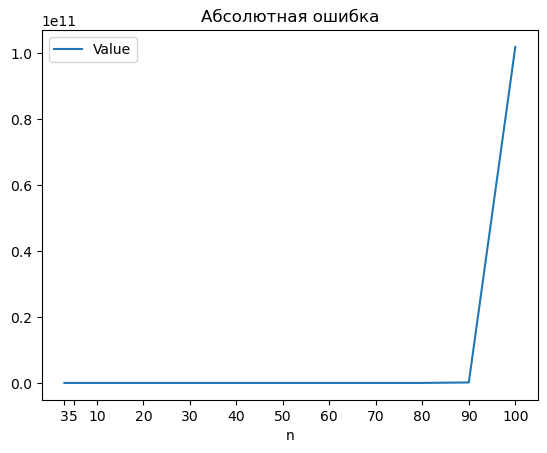

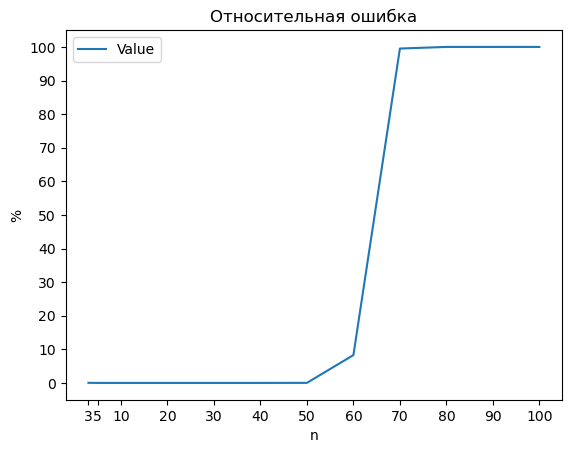

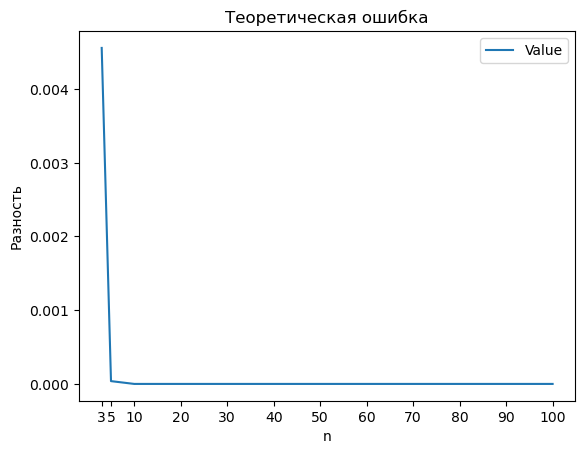

In [36]:
absolute_error_arr = []
relative_error_arr = []
theoretical_error_arr = []

for num_points in value_range:
    current_points = generate_points(graph_range, num_points, function)

    norm = calculate_max_absolute_value(function, graph_range)
    lagrange_norm = calculate_max_absolute_value(lagrange_interpolation, graph_range, current_points)
    absolute_error = max(abs(lagrange_interpolation(linspace(*graph_range, num=10 ** 3), current_points) - function(
        linspace(*graph_range, num=10 ** 3))))
    der_e = calculate_max_absolute_value(derivative_function, graph_range)
    rel_e = relative_error(absolute_error, lagrange_norm)
    ter_e = theoretical_error(num_points, graph_range)

    absolute_error_arr.append(absolute_error)
    relative_error_arr.append(rel_e)
    theoretical_error_arr.append(ter_e)

abs_df = pd.DataFrame(absolute_error_arr, value_range, columns=["Value"])
rel_df = pd.DataFrame(relative_error_arr, value_range, columns=["Value"])
ter_df = pd.DataFrame(theoretical_error_arr, value_range, columns=["Value"])

abs_df.plot(title="Абсолютная ошибка", xticks=value_range, xlabel="n", )

rel_df.plot(title="Относительная ошибка", xticks=value_range, yticks=range(0, 100 + 1, 10), xlabel="n", ylabel="%")
ter_df.plot(title="Теоретическая ошибка", xticks=value_range, xlabel="n", ylabel="Разность")

total_df = pd.DataFrame({"Абсолютная ошибка": absolute_error_arr,
                         "Относительная ошибка": relative_error_arr,
                         "Теоретическая ошибка": theoretical_error_arr},
                        index=value_range)
total_df.to_csv("ansv.csv")